C:\Users\mlanahan3\AppData\Local\Temp\ipykernel_204480\3130769931.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  R[0] = state_model.predict(np.array([[t[0],T[0]]]))
C:\Users\mlanahan3\AppData\Local\Temp\ipykernel_204480\3130769931.py:12: RuntimeWarning: invalid value encountered in scalar power
  arg = (X**nu - 1)**(-1./B)
C:\Users\mlanahan3\AppData\Local\Temp\ipykernel_204480\3130769931.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  R[i] = R[i-1] + dX


0.07186179940782353
[0.0718618  0.0718618  0.0718618  0.0718618  0.0718618  0.0718618
 0.0718618  0.0718618  0.0718618  0.0718618  0.0718618  0.0718618
 0.0718618  0.0718618  0.0718618  0.0718618  0.0718618  0.0718618
 0.0718618  0.0718618  0.0718618  0.0718618  0.0718618  0.07186181
 0.07186181 0.07186181 0.07186181 0.07186181 0.07186181 0.07186181
 0.07186181 0.07186181 0.07186182 0.07186182 0.07186182 0.07186182
 0.07186182 0.07186183 0.07186183 0.07186183 0.07186184 0.07186184
 0.07186184 0.07186185 0.07186185 0.07186186 0.07186186 0.07186187
 0.07186187 0.07186188 0.07186189 0.0718619  0.07186191 0.07186192
 0.07186193 0.07186194 0.07186195 0.07186196 0.07186198 0.07186199
 0.07186201 0.07186203 0.07186205 0.07186207 0.07186209 0.07186211
 0.07186213 0.07186216 0.07186219 0.07186222 0.07186225 0.07186228
 0.07186232 0.07186236 0.0718624  0.07186244 0.07186249 0.07186254
 0.07186259 0.07186264 0.0718627  0.07186276 0.07186283 0.07186289
 0.07186297 0.07186304 0.07186312 0.0718632  

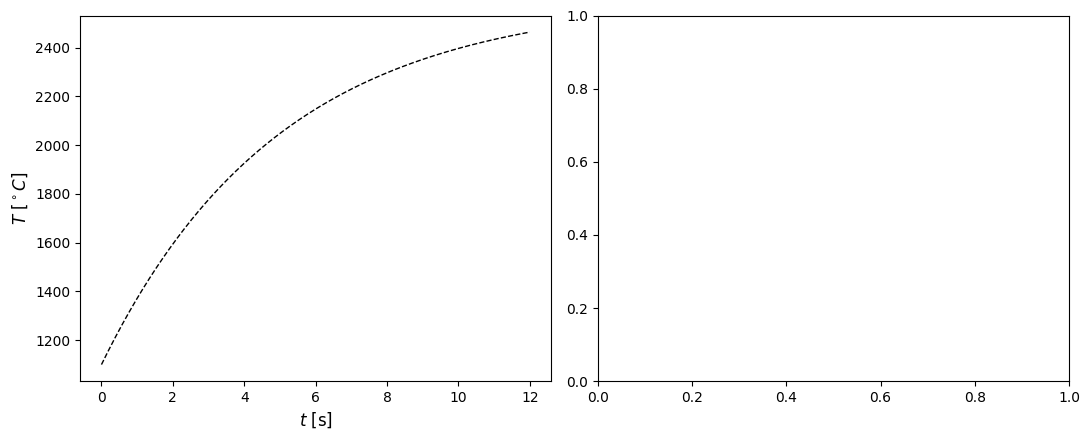

In [52]:
from common_util import LogLinearArrheniusModelFunc,generalized_logistic
import numpy as np
import math
import pickle
from matplotlib import pyplot as plt

def glm_inv_func(X: float,
                 B: float,
                 M: float,
                 nu: float):

    arg = (X**nu - 1)**(-1./B)
    if arg > 0:
        return math.log(arg) + M
    return 0.

def naively_integrate_state_model(state_model: LogLinearArrheniusModelFunc, 
                                  t: np.ndarray,
                                  T: np.ndarray):
    
    R = np.zeros_like(t)
    R[0] = state_model.predict(np.array([[t[0],T[0]]])) 
    print(R[0])
    nu = state_model.parameters()[0]
    for i in range(1,t.shape[0]):
        T_mid = (T[i] + T[i-1])/2
        B_init = state_model.ap1(T[i-1:i])[0]
        M_init = state_model.ap2(T[i-1:i])[0]
        t_star = glm_inv_func(R[i-1],B_init,M_init,nu)
        dt = t[i] - t[i-1]


        dX = state_model.predict(np.array([[t_star + dt, T_mid]])) - state_model.predict(np.array([[t_star, T_mid]]))

        R[i] = R[i-1] + dX  
        if R[i] >= 1:
            break
    
    R[i:] = 1
    
    
    return R

def example_temperature_profile(t: np.ndarray):

    return 1100 + 273.15 + 1500*(1 -np.exp(-t/5))

with open('.model/Generalized Logistic_richou_batch_a_robust weighted.pkl', 'rb') as f:
    state_model = pickle.load(f)

fig,axes = plt.subplots(figsize=(11,4.5),nrows = 1,ncols = 2)
t= np.linspace(0,12,1000)
T = example_temperature_profile(t)

R = naively_integrate_state_model(state_model,t,T)
print(R)

axes[0].plot(t,T - 273.15,lw = 1.0,ls = '--',color = 'k')
axes[0].set_xlabel(r'$t$ [s]',fontsize = 12) 
axes[0].set_ylabel(r'$T$ $[^\circ C]$',fontsize = 12) 

fig.tight_layout()

